# Cross-correlation coefficient distributions from pure noise

In this notebook I explore the distributions of cross-correlation coeffiecients from cross-correlating pure noise. This test is necessary to determine if the AC6 cross-correlation coefficients are high enough to avoid falling into this pitfall.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
np.random.seed(0) # For reproducibility

Define background baselines and cross-correlation width in data points

In [2]:
CC_widths = [5, 10, 15, 20]
n_trials = 1000
baseline = 100

Make a time series array with dimensions (CC_width x nBaslines x n_trials) where CC_width is the number of points to cross correlate, nBaseline is the number of baselines to study, and n_trials is how many random trails to cross-correlate. The noise-model used here Poisson at various count baselines

In [3]:
timeseries = {width:np.zeros((width, n_trials), dtype=float) for width in CC_widths}
for key in timeseries:
    timeseries[key] = np.random.poisson(lam=baseline, size=(key, n_trials))

Now here we define the cross-correlation function

In [5]:
def cross_correlate(x, y):
    cc = np.correlate(x-x.mean(), y-y.mean(), mode='valid')
    norm = np.sqrt(len(y)*len(y)*np.var(x)*np.var(y))
    return cc/norm

Now for each baseline, cross-correlate random pairs of noise from timeseries array

In [40]:
cc_bins = np.arange(0, 1.1, 0.2)
# number of baselines x number of histrogram bins.
cc_hist = {width:np.zeros(len(cc_bins)-1, dtype=float) for width in CC_widths}

for key in timeseries:
    for _ in range(n_trials):
        # Pick two trials at random.
        idxA, idxB = np.random.choice(np.arange(n_trials), size=2)
        # Cross-correlate the two random time series.
        cc = cross_correlate(timeseries[key][:, idxA], timeseries[key][:, idxB])
        # Now histogram it.
        cc_hist[key] += np.histogram(cc, bins=cc_bins)[0]

Normalize each histogram

In [41]:
for i in cc_hist:
    cc_hist[i] /= np.sum(cc_hist[i])

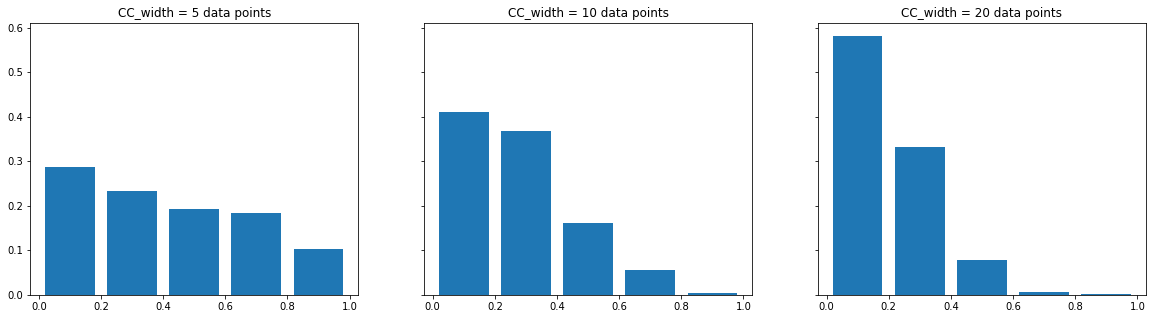

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True, sharex=True)
plt_keys = [5, 10, 20]
bin_width = cc_bins[1] - cc_bins[0]
for i, key in enumerate(plt_keys):
    ax[i].bar(cc_bins[1:]-bin_width/2, cc_hist[key], width=0.8*bin_width)
    ax[i].set_title('CC_width = {} data points'.format(key))

Lesson learned: cross-correlating more data points of noise results in a more peaked distribution around CC = 0.

### Comparison to the autocorrelation study
From the auto-correlation Monte Carlo study,

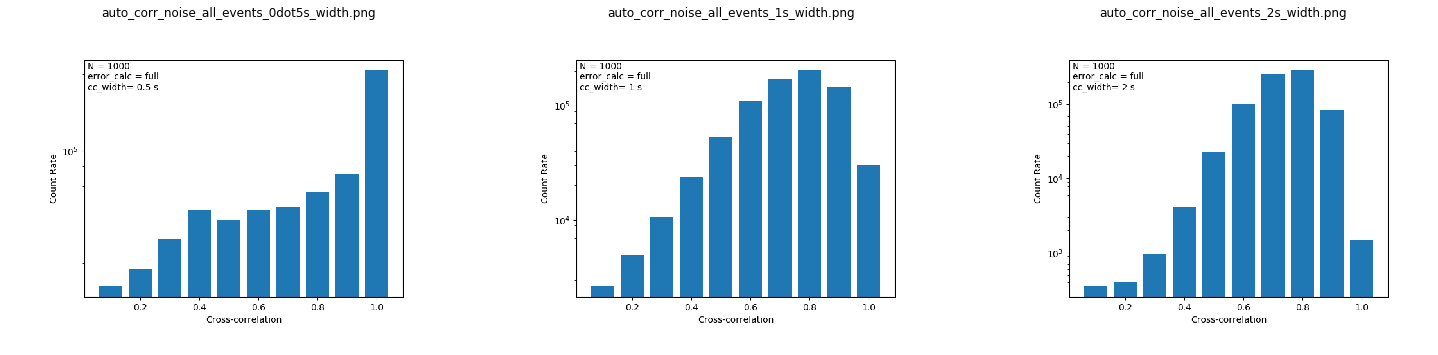

In [52]:
fnames = ['auto_corr_noise_all_events_0dot5s_width.png', 
          'auto_corr_noise_all_events_1s_width.png', 
          'auto_corr_noise_all_events_2s_width.png']
fig, ax = plt.subplots(1, 3, figsize=(25, 20))
for i, fname in enumerate(fnames):
    img = mpimg.imread(fname)
    ax[i].imshow(img)
    ax[i].set_title(fname)
    ax[i].axis('off')